To- Do- 1 Implementation of softmax function

In [1]:
import numpy as np
def softmax(z):
  #normalize input to prevent numerical instability
  exp_z = np.exp(z-np.max(z, axis=1, keepdims=True))
  return exp_z/np.sum(exp_z, axis=1, keepdims=True)

test case for softmax function

In [2]:
def test_softmax():
  #test input
  test_cases = [
      (np.array([[0, 0, 0]]), "All zeros"),
      (np.array([[1, 2, 3]]), " Simple case"),
      (np.array([[1000, 1000, 1000]]), "Large identical values"),
      (np.array([[-1000, -1000, -1000]]), "Small identical values"),
      (np.array([[1, 0, -1]]), "Mixed positive and negative")
  ]
  for i, (z, description) in enumerate(test_cases):
    print(f"Test case {i+1}: {description}")
    result = softmax(z)
    #check that probabilities sum to 1
    assert np.allclose(result.sum(axis=1), 1), f"Probabilities do not sum to 1 in {description}"
    #check non-negativity
    assert np.all(result >= 0), f"Negative values in {description}"
    print("passed")
  print("All tests passed for softmax function")
test_softmax()

Test case 1: All zeros
passed
Test case 2:  Simple case
passed
Test case 3: Large identical values
passed
Test case 4: Small identical values
passed
Test case 5: Mixed positive and negative
passed
All tests passed for softmax function


To-Do-3 Implement loss_softmax fxn

Implementation of categorical log loss fxn

In [3]:
def loss_softmax(y_true, y_pred):
  return -np.sum(y_true * np.log(y_pred + 1e-10))


Test case for categorical log-loss fxn

In [4]:
def test_loss_softmax():
  #test case 1: Perfect prediction
  y_true = np.array([0, 1, 0])
  y_pred = np.array([0.1, 0.8, 0.1])
  expected_loss = -np.log(0.8)
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test case 1 failed"
  #Test case 2 : Incorrect prediction
  y_true = np.array([1, 0, 0])
  y_pred = np.array([0.3, 0.4, 0.1])
  expected_loss = -np.log(0.3)
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test case 2 failed"
  #test case 3 : edge case with near-zero probability
  y_true = np.array([0, 1, 0])
  y_pred = np.array([0.01, 0.98, 0.01])
  expected_loss = -np.log(0.98)
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test case 3 failed"
  print("All tests passed")
test_loss_softmax()


All tests passed


To-Do-3 Implementation of cost function

In [5]:
def cost_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n


Testing the cost function

In [6]:
import numpy as np
def test_cost_softmax():
  #test case 1: small dataset with perfect predictions
  X = np.array([[1, 2], [2, 3], [3, 4]])
  y = np.array([[1, 0], [0, 1], [1, 0]])
  W = np.array([[1, -1], [-1, 1]])
  b = np.array([0, 0])
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  expected_loss = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
  assert np.isclose(cost_softmax(X, y, W, b), expected_loss), "Test case 1 failed"
  #Test case 2 : All zero weights and biases
  X = np.array([[1, 0], [0, 1], [1, 1]])
  y = np.array([[1, 0], [0, 1], [1, 0]])
  W = np.zeros((2,2))
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test case 2 failed"
  print("All test cases passed")
test_cost_softmax()

All test cases passed


Implementing Gradient Descent for training softmax regression

In [7]:
def compute_gradient_softmax(X, y, W, b):
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

Assertion test for compute gradient fxn

In [8]:
def test_compute_gradient_softmax():
  X = np.array([[1, 2], [3, 4]])
  y = np.array([[1, 0], [0, 1]])
  W = np.array([[0.1, 0.2], [0.3, 0.4]])
  b = np.array([0.01, 0.02])
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]
  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
  #Assertions
  assert np.allclose(grad_W, grad_W_expected, atol=1e-10), "Gradient W does not match expected values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-10), "Gradient b does not match expected values"
  print("All tests passed")
test_compute_gradient_softmax()


All tests passed


Gradient descent for softmax regression

In [9]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  cost_history = []
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)
    if show_cost and (i % 100 == 0 or i == n_iter -1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
  return W, b, cost_history

test for gradient descent fxn

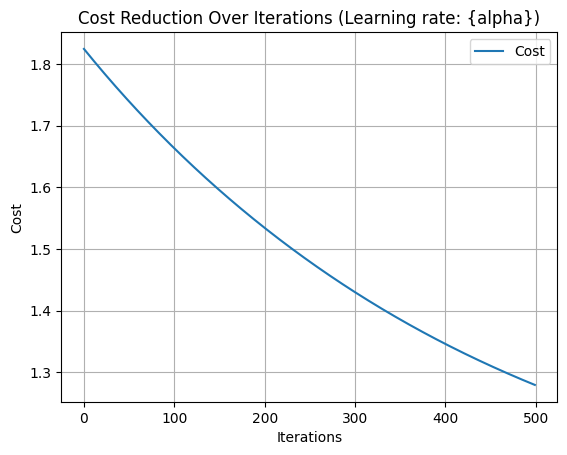

Initial costs: 1.8242205242959768
Final Cost: 1.279720517258938


In [10]:
from re import X
import matplotlib.pyplot as plt
def test_gradient_descent_softmax_with_plot():
  np.random.seed(0)
  n, d, c = 100, 5, 3
  X = np.random.randn(n, d)
  y_indices = np.random.randint(0, c, size=n)
  y = np.zeros((n, c))
  y[np.arange(n), y_indices] = 1
  W = np.random.randn(d, c)
  b = np.random.randn(c)
  alpha = 0.01
  n_iter = 500
  W_opt, b_opt, cost_history = gradient_descent_softmax(  X, y, W, b, alpha, n_iter, show_cost=False)
  plt.figure()
  plt.plot(range(n_iter), cost_history, label = "Cost")
  plt.xlabel("Iterations")
  plt.ylabel("Cost")
  plt.title("Cost Reduction Over Iterations (Learning rate: {alpha})")
  plt.legend()
  plt.grid()
  plt.show()
  print(f"Initial costs: {cost_history[0]}")
  print(f"Final Cost: {cost_history[-1]}")
test_gradient_descent_softmax_with_plot()


Decision / Precision Function

In [11]:
def predict_softmax(X, W, b):
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return np.argmax(y_pred, axis=1)

Simple assertion test for prediction function

In [12]:
def test_predict_softmax():
  np.random.seed(0)
  n, d, c = 10, 5, 3
  X = np.random.rand(n, d)
  W = np.random.rand(d, c)
  b = np.random.rand(c)
  predictions = predict_softmax(X, W, b)
  assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"
  assert np.all(predictions >= 0) and np.all(predictions < c), (
      f"Predictions out of range expected 0 to {c-1}, got {predictions}"
  )
  assert np.issubdtype(predictions.dtype, np.integer), f" Predictions are not integers: {predictions.dtype}"
  print(" All tests passed for predict_softmax")
test_predict_softmax()

 All tests passed for predict_softmax


evaluating classifier

In [13]:
def evaluate_classification(y_true, y_pred):
  from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
  cm = confusion_matrix(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
  recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
  f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
  return cm, precision, recall, f1

4.2 putting helper fxn to action

necessary inport and checking data

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
print("Dataset info:")
X.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Summary statistics

In [15]:
print("\nDataset Description before cleaning: ")
X.describe()


Dataset Description before cleaning: 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Constructing One Hot Encoding for Label Vector

In [16]:
from sklearn.preprocessing import OneHotEncoder
X = iris.data
y = iris.target
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

3. Train Test Split followed by standard scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]),f"Shape mismatch in X_train_scaled: {X_train_scaled}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]),f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
print("Shape assertions passed")

Shape assertions passed


Training of softmax Regression


Training Softmac Regression Model:
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


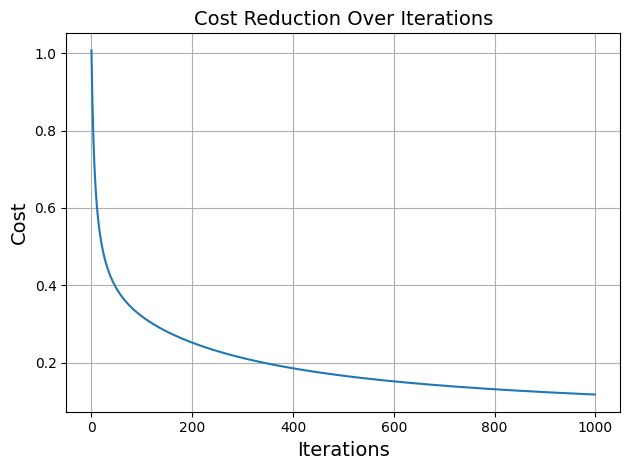

In [18]:
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmac Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost= True)
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iterations", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost Reduction Over Iterations", fontsize = 14)
plt.tight_layout()
plt.grid()
plt.show()

4. evaluating train and test performance on cost value

In [19]:
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1172
Test Loss (Cost): 0.1575


Evaluation on various metrics for classification


Test Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


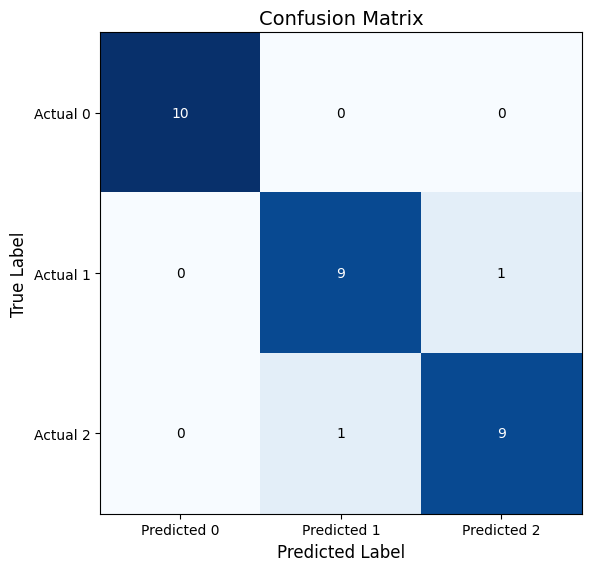

In [20]:
y_test_true = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
#visualizing
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues')
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2'])
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')
ax.grid(False)
plt.title("Confusion Matrix", fontsize = 14)
plt.xlabel("Predicted Label", fontsize = 12)
plt.ylabel("True Label", fontsize = 12)
plt.tight_layout()
plt.show()
